In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: >

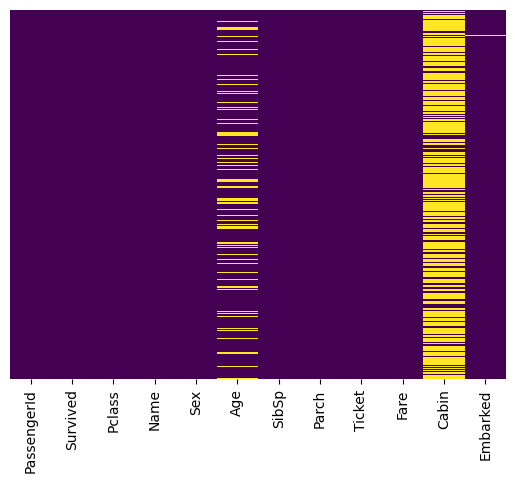

In [6]:
sns.heatmap(data = train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [7]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

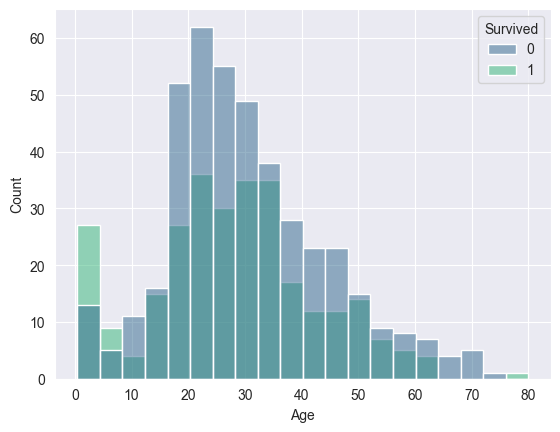

In [8]:
sns.set_style('darkgrid')
sns.histplot(data=train,x='Age',hue='Survived',palette='viridis',alpha=0.5)

<Axes: xlabel='Age', ylabel='Count'>

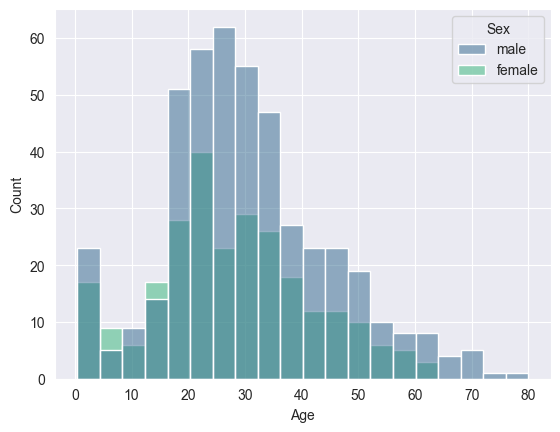

In [9]:
sns.histplot(data=train,x='Age',hue='Sex',palette='viridis',alpha=0.5)

<Axes: xlabel='Pclass', ylabel='count'>

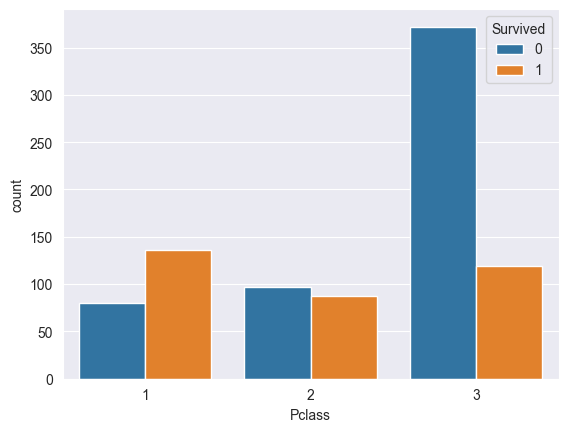

In [10]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [11]:
train.groupby('Pclass')['Age'].describe().T

Pclass,1,2,3
count,186.000000,173.000000,355.000000
mean,38.233441,29.877630,25.140620
std,14.802856,14.001077,12.495398
min,0.920000,0.670000,0.420000
25%,27.000000,23.000000,18.000000
50%,37.000000,29.000000,24.000000
75%,49.000000,36.000000,32.000000
max,80.000000,70.000000,74.000000


In [12]:
print(train[train['Sex']=='male']['Age'].mean())
print(train[train['Sex']=='female']['Age'].mean())

30.72664459161148
27.915708812260537


In [13]:
print(train[train['Survived']==0]['Age'].mean())
print(train[train['Survived']==1]['Age'].mean())

30.62617924528302
28.343689655172415


In [14]:
def fill_na(cols):
    age=cols[0]
    sex=cols[1]
    if pd.isnull(age):
        if sex=='male':
            return 30
        else:
            return 28
    else:
        return age

In [15]:
train['Age']= train[['Age','Sex']].apply(fill_na,axis=1)

<Axes: >

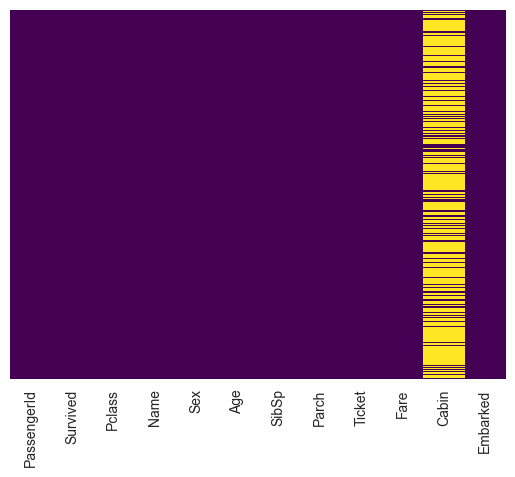

In [16]:
sns.heatmap(data = train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [17]:
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [19]:
train.drop(index=[61,829], inplace=True)


<Axes: >

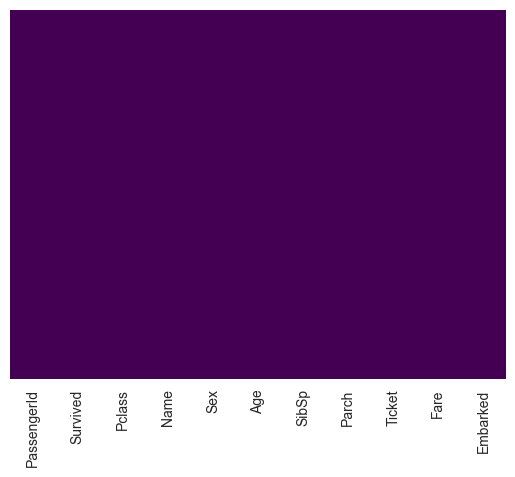

In [20]:
sns.heatmap(data = train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [21]:
male = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [22]:
new_train = pd.concat([train,male,embarked], axis=1)

In [23]:
new_train.drop(['Name','Sex','Embarked', 'Ticket'], axis=1, inplace=True)

In [24]:
new_train
X_train = new_train.drop('Survived', axis=1)
y_train = new_train['Survived']

In [32]:
test['Age'] = test[['Age','Sex']].apply(fill_na, axis=1)

In [34]:
test['Fare'].fillna(method='ffill', inplace=True)

In [33]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [35]:
test_male = pd.get_dummies(test['Sex'], drop_first=True)
test_embarked = pd.get_dummies(test['Embarked'], drop_first=True)
X_test = pd.concat([test,test_male,test_embarked], axis=1)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(max_iter=1000)

In [38]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
X_test.drop(['Name','Sex','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [40]:
pred = lr.predict(X_test)

In [41]:
X_test['predictions'] = pred

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
gender_sub = pd.read_csv('gender_submission.csv')
y_test = X_test.merge(gender_sub, on='PassengerId', how='left')

In [47]:
print(confusion_matrix(y_test['Survived'],y_test['predictions']))
print('\n')
print(classification_report(y_test['Survived'], y_test['predictions']))

[[250  16]
 [  8 144]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.90      0.95      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

